In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sodapy import Socrata

In [79]:
def download_and_save_dataset(domain,dataset_id,app_token, offset = 0, file_count = 1):
    client = Socrata(domain, 
                     app_token,
                     username='',
                     password=r"",
                     timeout = 50)
    offset = offset
    data = []
    batch_size = 500000
    file_count = file_count
    
    while True:
        records = client.get(dataset_id, 
                             offset = offset, 
                             limit = batch_size)
        
        data.extend(records)
        pd.DataFrame.from_records(records).to_csv(f'la_city_vax_data_{file_count}.csv', index = False)
        file_count += 1
        
        if len(records) < batch_size:
            break
            
        offset = offset + batch_size 
    
    return pd.DataFrame.from_records(data), len(data)

In [3]:
#vax_data, length = download_and_save_dataset('data.lacity.org', 'iv7a-6rrq','', 15000000, 31)
#length

**Preprocess main file**
1. read csv to a dataframe
2. drop 'Unnamed: 0' column
3. drop duplicates
4. handle missing value
5. divide dataframe according to demographic_category and write to csv

In [107]:
def preproces_vax_data(file_count):
    vax_df = pd.read_csv(f'la_city_vax_data_{file_count}.csv')
    if 'Unnamed: 0' in vax_df.columns:
        vax_df.drop('Unnamed: 0',axis = 1, inplace = True)
        
    vax_df.drop_duplicates(inplace = True)
    
    na_df = get_all_null_subdf(vax_df)
    
    vax_df = pd.concat([vax_df, na_df]).drop_duplicates(keep = False)
    
    fillna_with_mean(vax_df)
    
    save_data_by_demographic_cat(vax_df, file_count)
    
    vax_df.to_csv(f'la_city_vax_data_{file_count}.csv', index = False)

In [108]:
for file_count in range(1,41):
    preproces_vax_data(file_count)

In [82]:
preproces_vax_data(1)

In [88]:
# Read CSV files from List
#df = pd.concat(map(pd.read_csv, ['d1.csv', 'd2.csv','d3.csv']))
def make_fnames(file_cat, start = 1, end = 5):
    file_names = []
    for file_count in range(start,end + 1):
        file_names.append(f'la_city_vax_data_{file_cat}_{file_count}.csv')
    return file_names


make_fnames('ag', 10,15)  

['la_city_vax_data_ag_10.csv',
 'la_city_vax_data_ag_11.csv',
 'la_city_vax_data_ag_12.csv',
 'la_city_vax_data_ag_13.csv',
 'la_city_vax_data_ag_14.csv',
 'la_city_vax_data_ag_15.csv']

In [92]:
def merge_df(file_cat, start, end):
    fnames = make_fnames(file_cat, start, end) 
    df = pd.concat(map(pd.read_csv, fnames))
    df.drop_duplicates(inplace = True)
    return df

In [117]:
'''
from pathlib import Path  
filepath = Path('folder/subfolder/out.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)
'''
from pathlib import Path  
def write_to_a_path(df,file_cat, file_count):
    filepath = Path(f'lacity/la_city_vax_data_{file_cat}_{file_count}.csv')
    filepath.parent.mkdir(parents=True, exist_ok=True) 
    df.to_csv(filepath)

In [119]:
def merge_and_write(file_cat,file_count, start, end):
    merged_df = merge_df(file_cat, start, end)
    write_to_a_path(merged_df,file_cat, file_count)

In [127]:
merge_and_write('ag',1,1,5)
merge_and_write('ag',2,6,10)
merge_and_write('ag',3,11,15)
merge_and_write('ag',4,16,20)
merge_and_write('ag',5,21,25)
merge_and_write('ag',6,26,30)
merge_and_write('ag',7,31,35)
merge_and_write('ag',8,36,40)

In [91]:
#vax_df = pd.read_csv('la_city_vax_data_1.csv')
#vax_df.head(5)

In [125]:
merge_and_write('re',1,1,5)
merge_and_write('re',2,6,10)
merge_and_write('re',3,11,15)
merge_and_write('re',4,16,20)
merge_and_write('re',5,21,25)
merge_and_write('re',6,26,30)
merge_and_write('re',7,31,35)
merge_and_write('re',8,36,40)

In [126]:
merge_and_write('vemq',1,1,5)
merge_and_write('vemq',2,6,10)
merge_and_write('vemq',3,11,15)
merge_and_write('vemq',4,16,20)
merge_and_write('vemq',5,21,25)
merge_and_write('vemq',6,26,30)
merge_and_write('vemq',7,31,35)
merge_and_write('vemq',8,36,40)

In [118]:
write_to_a_path(merged_df, 'ag', '1')

In [109]:
merged_df = merge_df('ag', 1, 5)
merged_df.shape

(498078, 13)

In [110]:
merged_df.sample()

,county,demographic_category,demographic_value,est_population,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,date
86228,Sonoma,Age Group,65+,112490.0,12.0,7252.0,17.0,86907.0,12.0,94159.0,18331.0,18331.0,2021-09-04T00:00:00.000


In [111]:
#print_duplicate(merged_df)

merged_df[merged_df.duplicated(keep = 'first')]

,county,demographic_category,demographic_value,est_population,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,date
1,Sierra,Age Group,12-17,144.0,0.0,15.0,0.0,29.0,0.0,44.0,100.0,100.0,2021-09-17T00:00:00.000
2,Sierra,Age Group,12-17,144.0,0.0,15.0,0.0,29.0,0.0,44.0,100.0,100.0,2021-09-16T00:00:00.000
3,Sierra,Age Group,12-17,144.0,1.0,15.0,3.0,29.0,1.0,44.0,100.0,100.0,2021-09-15T00:00:00.000
4,Sierra,Age Group,12-17,144.0,2.0,17.0,0.0,26.0,2.0,43.0,101.0,101.0,2021-09-14T00:00:00.000
5,Sierra,Age Group,12-17,144.0,1.0,15.0,1.0,26.0,1.0,41.0,103.0,103.0,2021-09-13T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93481,Lassen,Age Group,18-49,15112.0,8.0,406.0,6.0,2024.0,10.0,2430.0,12682.0,12682.0,2021-09-02T00:00:00.000
93482,Lassen,Age Group,18-49,15112.0,5.0,402.0,10.0,2018.0,8.0,2420.0,12692.0,12692.0,2021-09-01T00:00:00.000
93483,Lassen,Age Group,18-49,15112.0,10.0,404.0,10.0,2008.0,15.0,2412.0,12700.0,12700.0,2021-08-31T00:00:00.000
93484,Lassen,Age Group,18-49,15112.0,7.0,399.0,9.0,1998.0,7.0,2397.0,12715.0,12715.0,2021-08-30T00:00:00.000


In [116]:
merged_df.drop_duplicates(inplace = True)
merged_df.shape

(490024, 13)

In [112]:
merged_re = merge_df('re', 1, 5)
merged_re.shape

(1007328, 13)

In [113]:
merged_re_dup = print_duplicate(merged_re)
merged_re_dup

,county,demographic_category,demographic_value,est_population,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,date
0,Shasta,Race/Ethnicity,Native Hawaiian or Other Pacific Islander,250.0,2.0,37.0,0.0,175.0,2.0,212.0,38.0,2.0,2021-08-31T00:00:00.000
1,Shasta,Race/Ethnicity,Native Hawaiian or Other Pacific Islander,250.0,1.0,35.0,3.0,175.0,2.0,210.0,40.0,4.0,2021-08-30T00:00:00.000
59,Shasta,Race/Ethnicity,White,141855.0,135.0,9513.0,125.0,46336.0,168.0,55849.0,86006.0,66224.0,2021-09-01T00:00:00.000
60,Shasta,Race/Ethnicity,White,141855.0,135.0,9470.0,120.0,46211.0,148.0,55681.0,86174.0,66392.0,2021-08-31T00:00:00.000
61,Shasta,Race/Ethnicity,White,141855.0,119.0,9442.0,122.0,46091.0,143.0,55533.0,86322.0,66540.0,2021-08-30T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207145,Siskiyou,Race/Ethnicity,Latino,5333.0,0.0,254.0,1.0,1667.0,0.0,1921.0,3412.0,2782.0,2021-10-16T00:00:00.000
207146,Siskiyou,Race/Ethnicity,Latino,5333.0,0.0,255.0,4.0,1666.0,0.0,1921.0,3412.0,2782.0,2021-10-15T00:00:00.000
207147,Siskiyou,Race/Ethnicity,Latino,5333.0,3.0,259.0,1.0,1662.0,3.0,1921.0,3412.0,2782.0,2021-10-14T00:00:00.000
207148,Siskiyou,Race/Ethnicity,Latino,5333.0,2.0,257.0,3.0,1661.0,2.0,1918.0,3415.0,2785.0,2021-10-13T00:00:00.000


In [114]:
check_na(merged_re_dup)

county                          0.0
demographic_category            0.0
demographic_value               0.0
est_population                  0.0
partially_vaccinated            0.0
total_partially_vaccinated      0.0
fully_vaccinated                0.0
cumulative_fully_vaccinated     0.0
at_least_one_dose               0.0
cumulative_at_least_one_dose    0.0
cumulative_unvax_total_pop      0.0
cumulative_unvax_12plus_pop     0.0
date                            0.0
dtype: float64

In [95]:
'''
if 'Unnamed: 0' in vax_df.columns:
    vax_df.drop('Unnamed: 0',axis = 1, inplace = True)
vax_df.head(5)
'''

"\nif 'Unnamed: 0' in vax_df.columns:\n    vax_df.drop('Unnamed: 0',axis = 1, inplace = True)\nvax_df.head(5)\n"

In [5]:
#vax_df.shape

(500000, 13)

**Checking for duplicates**

In [101]:
def print_duplicate(vax_df):
    return vax_df[vax_df.duplicated(keep = 'first')]

In [6]:
vax_df[vax_df.duplicated(keep = 'first')]

,county,demographic_category,demographic_value,est_population,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,date
10280,Alpine,Race/Ethnicity,Other Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-08T00:00:00.000
10330,Alpine,Race/Ethnicity,Other Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-07T00:00:00.000
10379,Alpine,Race/Ethnicity,Other Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-06T00:00:00.000
10640,Alpine,Race/Ethnicity,Other Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-05T00:00:00.000
10690,Alpine,Race/Ethnicity,Other Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-04T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,Shasta,Race/Ethnicity,Native Hawaiian or Other Pacific Islander,250.0,0.0,40.0,0.0,176.0,0.0,216.0,34.0,0.0,2021-09-05T00:00:00.000
499996,Shasta,Race/Ethnicity,Native Hawaiian or Other Pacific Islander,250.0,0.0,40.0,0.0,176.0,0.0,216.0,34.0,0.0,2021-09-04T00:00:00.000
499997,Shasta,Race/Ethnicity,Native Hawaiian or Other Pacific Islander,250.0,2.0,40.0,1.0,176.0,2.0,216.0,34.0,0.0,2021-09-03T00:00:00.000
499998,Shasta,Race/Ethnicity,Native Hawaiian or Other Pacific Islander,250.0,1.0,39.0,0.0,175.0,1.0,214.0,36.0,0.0,2021-09-02T00:00:00.000


In [7]:
vax_df.drop_duplicates(inplace = True)       #default keep = 'first'

vax_df.shape

(354358, 13)

**checking for null**

In [8]:
vax_df.isna().sum()/len(vax_df)*100

county                           0.000000
demographic_category             0.000000
demographic_value                0.000000
est_population                  15.705304
partially_vaccinated             0.970205
total_partially_vaccinated       0.970205
fully_vaccinated                 0.970205
cumulative_fully_vaccinated      0.970205
at_least_one_dose                0.970205
cumulative_at_least_one_dose     0.970205
cumulative_unvax_total_pop      16.591131
cumulative_unvax_12plus_pop     16.591131
date                             0.000000
dtype: float64

In [9]:
def check_na(df):
    return df.isna().sum()/len(df)*100

In [10]:
vax_df.dtypes

county                           object
demographic_category             object
demographic_value                object
est_population                  float64
partially_vaccinated            float64
total_partially_vaccinated      float64
fully_vaccinated                float64
cumulative_fully_vaccinated     float64
at_least_one_dose               float64
cumulative_at_least_one_dose    float64
cumulative_unvax_total_pop      float64
cumulative_unvax_12plus_pop     float64
date                             object
dtype: object

In [11]:
len(vax_df)

354358

In [12]:
#df.loc[(pd.isnull(df['a']) & (pd.isnull(df['b'])]
#df[df['a'].isnull() & df['b'].isnull()]
na_val_df = vax_df[vax_df['partially_vaccinated'].isna() & vax_df['total_partially_vaccinated'].isna() 
                & vax_df['fully_vaccinated'].isna() & vax_df['cumulative_fully_vaccinated'].isna() 
                & vax_df['at_least_one_dose'].isna()& vax_df['cumulative_at_least_one_dose'].isna()]
na_val_df

,county,demographic_category,demographic_value,est_population,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,date
45,Alpine,Race/Ethnicity,Multiracial,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-31T00:00:00.000
1092,Alpine,Race/Ethnicity,Multiracial,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-30T00:00:00.000
1134,Alpine,Race/Ethnicity,Other Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-09T00:00:00.000
1176,Alpine,Race/Ethnicity,Other Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-08T00:00:00.000
1218,Alpine,Race/Ethnicity,Other Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-07T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485299,Alpine,Race/Ethnicity,Black or African American,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-18T00:00:00.000
485319,Alpine,Race/Ethnicity,Latino,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-18T00:00:00.000
485359,Alpine,Race/Ethnicity,Native Hawaiian or Other Pacific Islander,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-18T00:00:00.000
493180,Modoc,Race/Ethnicity,Native Hawaiian or Other Pacific Islander,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-18T00:00:00.000


In [67]:
def get_null_subdf(vax_df):
    na_df = vax_df[vax_df['partially_vaccinated'].isna() & vax_df['total_partially_vaccinated'].isna() 
                & vax_df['fully_vaccinated'].isna() & vax_df['cumulative_fully_vaccinated'].isna() 
                & vax_df['at_least_one_dose'].isna()& vax_df['cumulative_at_least_one_dose'].isna()]
    return na_df

In [13]:
'''
Droping a dataframe from another dataframe
pd.concat([df1, df2, df2]).drop_duplicates(keep=False)
'''
vax_df = pd.concat([vax_df, na_val_df]).drop_duplicates(keep = False)
vax_df.shape

(350920, 13)

In [14]:
check_na(vax_df)

county                           0.000000
demographic_category             0.000000
demographic_value                0.000000
est_population                  15.773966
partially_vaccinated             0.000000
total_partially_vaccinated       0.000000
fully_vaccinated                 0.000000
cumulative_fully_vaccinated      0.000000
at_least_one_dose                0.000000
cumulative_at_least_one_dose     0.000000
cumulative_unvax_total_pop      15.773966
cumulative_unvax_12plus_pop     15.773966
date                             0.000000
dtype: float64

In [15]:
partial_na_df = vax_df[vax_df['est_population'].isna() 
                & vax_df['cumulative_unvax_total_pop'].isna() 
                & vax_df['cumulative_unvax_12plus_pop'].isna()]
partial_na_df.shape

(55354, 13)

In [68]:
def fillna_with_mean(vax_df):
    vax_df['est_population'] = vax_df['est_population'].fillna(value=vax_df['est_population'].mean())
    vax_df['cumulative_unvax_total_pop'] = vax_df['cumulative_unvax_total_pop'].fillna(value=vax_df['cumulative_unvax_total_pop'].mean())
    vax_df['cumulative_unvax_12plus_pop'] = vax_df['cumulative_unvax_12plus_pop'].fillna(value=vax_df['cumulative_unvax_12plus_pop'].mean())

In [16]:
#fill null values with mean values
#df["Age"] = df["Age"].fillna(value=df["Age"].mean())
vax_df['est_population'] = vax_df['est_population'].fillna(value=vax_df['est_population'].mean())
vax_df['cumulative_unvax_total_pop'] = vax_df['cumulative_unvax_total_pop'].fillna(value=vax_df['cumulative_unvax_total_pop'].mean())
vax_df['cumulative_unvax_12plus_pop'] = vax_df['cumulative_unvax_12plus_pop'].fillna(value=vax_df['cumulative_unvax_12plus_pop'].mean())

check_na(vax_df)

county                          0.0
demographic_category            0.0
demographic_value               0.0
est_population                  0.0
partially_vaccinated            0.0
total_partially_vaccinated      0.0
fully_vaccinated                0.0
cumulative_fully_vaccinated     0.0
at_least_one_dose               0.0
cumulative_at_least_one_dose    0.0
cumulative_unvax_total_pop      0.0
cumulative_unvax_12plus_pop     0.0
date                            0.0
dtype: float64

In [17]:
vax_df.shape

(350920, 13)

In [18]:
vax_df['demographic_category'].value_counts()

Race/Ethnicity    184125
Age Group          85518
VEM Quartile       81277
Name: demographic_category, dtype: int64

In [19]:
vax_df['demographic_value'].value_counts()

White                                        21813
18-49                                        21718
50-64                                        21594
65+                                          21536
Unknown                                      21491
2                                            21275
Latino                                       21226
Other Race                                   21084
12-17                                        20670
3                                            20638
Multiracial                                  20473
Asian                                        20423
1                                            20085
American Indian or Alaska Native             19853
Black or African American                    19553
4                                            19279
Native Hawaiian or Other Pacific Islander    18209
Name: demographic_value, dtype: int64

In [20]:
vax_df.describe()

,est_population,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop
count,3.509200e+05,350920.000000,3.509200e+05,350920.000000,3.509200e+05,350920.000000,3.509200e+05,3.509200e+05,3.509200e+05
mean,2.808530e+05,455.332193,2.088479e+04,449.976875,9.171174e+04,494.631677,1.125965e+05,1.532754e+05,1.236424e+05
std,1.182523e+06,3240.103187,1.126350e+05,3214.558547,5.182939e+05,3532.267262,6.122462e+05,7.268136e+05,6.119522e+05
min,1.600000e+01,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.226000e+03,1.000000,1.110000e+02,1.000000,1.770000e+02,1.000000,4.100000e+02,2.861000e+03,2.353000e+03
50%,4.422200e+04,14.000000,1.037000e+03,12.000000,2.831000e+03,16.000000,4.539000e+03,2.119750e+04,1.688500e+04
75%,2.808530e+05,111.000000,7.360000e+03,106.000000,2.523000e+04,121.000000,3.513100e+04,1.532754e+05,1.236424e+05
max,1.689618e+07,203586.000000,3.444513e+06,177080.000000,1.123958e+07,205395.000000,1.286770e+07,1.689532e+07,1.689532e+07


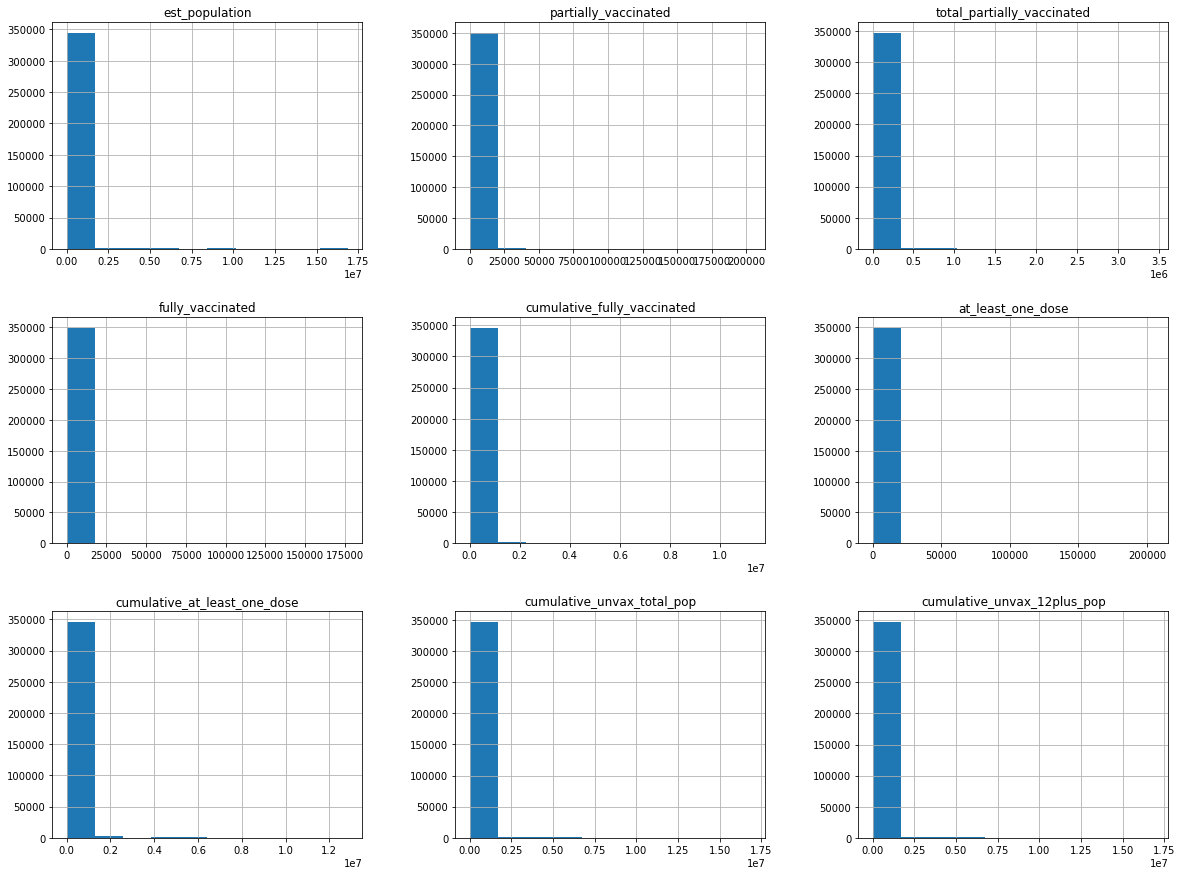

In [21]:
#vax_df.hist(bins=50, figsize=(20,15))
vax_df.hist(figsize=(20,15))
plt.show()

In [22]:
'''plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.grid(True)
plt.show()'''

"plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)\nplt.xlabel('Smarts')\nplt.ylabel('Probability')\nplt.title('Histogram of IQ')\nplt.text(60, .025, r'$\\mu=100,\\ \\sigma=15$')\nplt.xlim(40, 160)\nplt.ylim(0, 0.03)\nplt.grid(True)\nplt.show()"

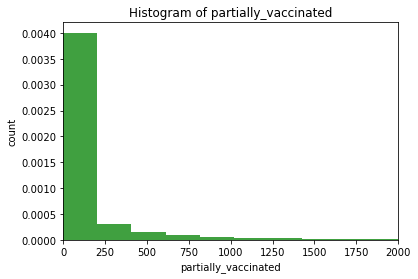

In [23]:
plt.hist(vax_df['partially_vaccinated'], 1000, density=True, facecolor='g', alpha=0.75)
plt.xlabel('partially_vaccinated')
plt.ylabel('count')
plt.title('Histogram of partially_vaccinated')
plt.xlim(0, 2000)
plt.show()

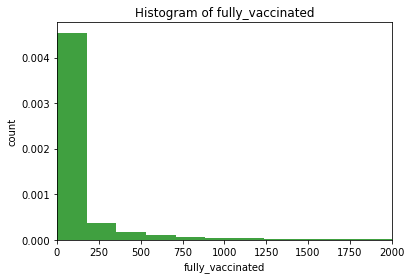

In [24]:
plt.hist(vax_df['fully_vaccinated'], 1000, density=True, facecolor='g', alpha=0.75)
plt.xlabel('fully_vaccinated')
plt.ylabel('count')
plt.title('Histogram of fully_vaccinated')
plt.xlim(0, 2000)
plt.show()

In [25]:
#sns.pairplot(vax_df, kind="reg", diag_kind="kde")

In [26]:
vax_df.sample


<bound method NDFrame.sample of          county demographic_category  \
0       Alameda            Age Group   
1       Alameda            Age Group   
2       Alameda            Age Group   
3       Alameda            Age Group   
4       Alameda            Age Group   
...         ...                  ...   
499978   Shasta       Race/Ethnicity   
499979   Shasta       Race/Ethnicity   
499980   Shasta       Race/Ethnicity   
499981   Shasta       Race/Ethnicity   
499982   Shasta       Race/Ethnicity   

                                demographic_value  est_population  \
0                                           12-17        125790.0   
1                                           12-17        125790.0   
2                                           12-17        125790.0   
3                                           12-17        125790.0   
4                                           12-17        125790.0   
...                                           ...             ...   
4999

<AxesSubplot:xlabel='partially_vaccinated', ylabel='Count'>

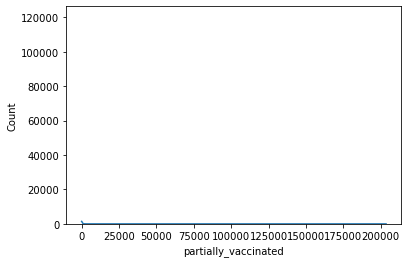

In [27]:
sns.histplot(vax_df['partially_vaccinated'],kde=True)

<AxesSubplot:xlabel='partially_vaccinated'>

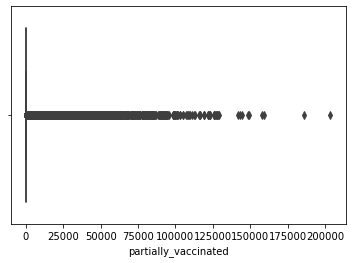

In [28]:
sns.boxplot(vax_df['partially_vaccinated'])

<AxesSubplot:>

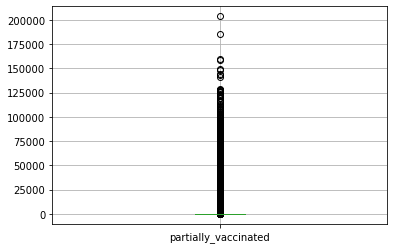

In [29]:
vax_df.boxplot(column='partially_vaccinated')

In [30]:
vax_df.demographic_value.value_counts()

White                                        21813
18-49                                        21718
50-64                                        21594
65+                                          21536
Unknown                                      21491
2                                            21275
Latino                                       21226
Other Race                                   21084
12-17                                        20670
3                                            20638
Multiracial                                  20473
Asian                                        20423
1                                            20085
American Indian or Alaska Native             19853
Black or African American                    19553
4                                            19279
Native Hawaiian or Other Pacific Islander    18209
Name: demographic_value, dtype: int64

**Experiment with one day data of Alameda**

In [47]:
#one_day = df1.loc[df1['date']=='2021-08-29T00:00:00.000']
#alameda = one_day[one_day['county']=='Alameda']
#alameda

#one_day = vax_df.loc[vax_df['date']=='2021-08-29T00:00:00.000']
#alameda = one_day[one_day['county']=='Alameda']
#alameda


In [48]:
#alameda_age = alameda[alameda['demographic_category'] == 'Age Group']       #.query('demographic_category == Age Group')
#alameda_age

In [49]:
#alameda_age.partially_vaccinated.sum()

In [50]:
#alameda_age.fully_vaccinated.sum()

In [51]:
#alameda_re = alameda[alameda['demographic_category'] == 'Race/Ethnicity'] 
#alameda_re

In [52]:
#alameda_re.partially_vaccinated.sum()

In [53]:
#alameda_re.fully_vaccinated.sum()

In [55]:
#alameda_vem = alameda[alameda['demographic_category'] == 'VEM Quartile'] 
#alameda_vem

In [56]:
#alameda_vem.partially_vaccinated.sum()

In [57]:
#alameda_vem.fully_vaccinated.sum()

In [59]:
def write_to_csv(df,file_cat, file_count):
    df.to_csv(f'la_city_vax_data_{file_cat}_{file_count}.csv', index = False)

In [41]:
df_whole = vax_df.copy(deep=True)
df_whole.shape


(350920, 13)

In [42]:
df_age = df_whole[df_whole['demographic_category'] == 'Age Group']
df_age.head()

,county,demographic_category,demographic_value,est_population,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,date
0,Alameda,Age Group,12-17,125790.0,35.0,10943.0,79.0,81709.0,35.0,92652.0,33138.0,33138.0,2021-08-29T00:00:00.000
1,Alameda,Age Group,12-17,125790.0,196.0,10987.0,322.0,81630.0,197.0,92617.0,33173.0,33173.0,2021-08-28T00:00:00.000
2,Alameda,Age Group,12-17,125790.0,308.0,11112.0,645.0,81308.0,309.0,92420.0,33370.0,33370.0,2021-08-27T00:00:00.000
3,Alameda,Age Group,12-17,125790.0,198.0,11448.0,393.0,80663.0,198.0,92111.0,33679.0,33679.0,2021-08-26T00:00:00.000
4,Alameda,Age Group,12-17,125790.0,179.0,11643.0,309.0,80270.0,179.0,91913.0,33877.0,33877.0,2021-08-25T00:00:00.000


In [43]:
df_age.shape

(85518, 13)

In [60]:
write_to_csv(df_age, 'ag', '1')

In [44]:
df_r_e = df_whole[df_whole['demographic_category'] == 'Race/Ethnicity']
df_r_e.head()

,county,demographic_category,demographic_value,est_population,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,date
278,Nevada,Race/Ethnicity,Other Race,280853.023494,4.0,616.0,4.0,1737.0,4.0,2353.0,153275.358082,123642.384219,2021-08-31T00:00:00.000
1034,Alameda,Race/Ethnicity,American Indian or Alaska Native,4920.000000,1.0,467.0,0.0,3325.0,1.0,3792.0,1128.000000,419.000000,2021-08-29T00:00:00.000
1035,Alameda,Race/Ethnicity,American Indian or Alaska Native,4920.000000,5.0,466.0,4.0,3325.0,5.0,3791.0,1129.000000,420.000000,2021-08-28T00:00:00.000
1036,Alameda,Race/Ethnicity,American Indian or Alaska Native,4920.000000,9.0,465.0,9.0,3321.0,9.0,3786.0,1134.000000,425.000000,2021-08-27T00:00:00.000
1037,Alameda,Race/Ethnicity,American Indian or Alaska Native,4920.000000,6.0,465.0,7.0,3312.0,6.0,3777.0,1143.000000,434.000000,2021-08-26T00:00:00.000


In [102]:
df_ag_dup = print_duplicate(df_age)
df_ag_dup

,county,demographic_category,demographic_value,est_population,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,date


In [45]:
df_r_e.shape

(184125, 13)

In [61]:
write_to_csv(df_r_e, 're', '1')

In [46]:
df_vemq = df_whole[df_whole['demographic_category'] == 'VEM Quartile']
df_vemq.head()

,county,demographic_category,demographic_value,est_population,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,date
3370,Alameda,VEM Quartile,1,123936.0,12.0,10124.0,23.0,70596.0,13.0,80720.0,43216.0,20140.0,2021-08-29T00:00:00.000
3371,Alameda,VEM Quartile,1,123936.0,135.0,10134.0,168.0,70573.0,138.0,80707.0,43229.0,20153.0,2021-08-28T00:00:00.000
3372,Alameda,VEM Quartile,1,123936.0,260.0,10164.0,345.0,70405.0,270.0,80569.0,43367.0,20291.0,2021-08-27T00:00:00.000
3373,Alameda,VEM Quartile,1,123936.0,223.0,10239.0,262.0,70060.0,238.0,80299.0,43637.0,20561.0,2021-08-26T00:00:00.000
3374,Alameda,VEM Quartile,1,123936.0,165.0,10263.0,174.0,69798.0,166.0,80061.0,43875.0,20799.0,2021-08-25T00:00:00.000


In [77]:
write_to_csv(df_vemq, 'vemq', '1')

In [63]:
#df = pd.read_csv('la_city_vax_data_ag_1.csv')
#df.head(5)

,county,demographic_category,demographic_value,est_population,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,date
0,Alameda,Age Group,12-17,125790.0,35.0,10943.0,79.0,81709.0,35.0,92652.0,33138.0,33138.0,2021-08-29T00:00:00.000
1,Alameda,Age Group,12-17,125790.0,196.0,10987.0,322.0,81630.0,197.0,92617.0,33173.0,33173.0,2021-08-28T00:00:00.000
2,Alameda,Age Group,12-17,125790.0,308.0,11112.0,645.0,81308.0,309.0,92420.0,33370.0,33370.0,2021-08-27T00:00:00.000
3,Alameda,Age Group,12-17,125790.0,198.0,11448.0,393.0,80663.0,198.0,92111.0,33679.0,33679.0,2021-08-26T00:00:00.000
4,Alameda,Age Group,12-17,125790.0,179.0,11643.0,309.0,80270.0,179.0,91913.0,33877.0,33877.0,2021-08-25T00:00:00.000


In [106]:
def save_data_by_demographic_cat(df_whole, file_count):
    df_age = df_whole[df_whole['demographic_category'] == 'Age Group']
    write_to_csv(df_age, 'ag', file_count)
    
    df_r_e = df_whole[df_whole['demographic_category'] == 'Race/Ethnicity']
    write_to_csv(df_r_e, 're', file_count)
    
    df_vemq = df_whole[df_whole['demographic_category'] == 'VEM Quartile']
    write_to_csv(df_vemq, 'vemq', file_count)